In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:11<00:00, 24.3MB/s]
100% 218M/218M [00:11<00:00, 19.1MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout


In [9]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)

)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [33]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float64)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [34]:
#creating CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 [==============================] - 37s 138ms/step - loss: 2.2434 - accuracy: 0.5373 - val_loss: 34.3016 - val_accuracy: 0.4998
Epoch 2/10
251/251 [==============================] - 34s 135ms/step - loss: 0.8469 - accuracy: 0.5467 - val_loss: 30.7703 - val_accuracy: 0.4998
Epoch 3/10
251/251 [==============================] - 32s 127ms/step - loss: 0.6781 - accuracy: 0.6049 - val_loss: 0.7158 - val_accuracy: 0.6362
Epoch 4/10
251/251 [==============================] - 32s 128ms/step - loss: 0.6472 - accuracy: 0.6438 - val_loss: 0.6242 - val_accuracy: 0.6550
Epoch 5/10
251/251 [==============================] - 33s 129ms/step - loss: 0.5830 - accuracy: 0.6881 - val_loss: 0.6028 - val_accuracy: 0.6718
Epoch 6/10
251/251 [==============================] - 32s 128ms/step - loss: 0.5358 - accuracy: 0.7305 - val_loss: 0.5632 - val_accuracy: 0.7182
Epoch 7/10
251/251 [==============================] - 38s 149ms/step - loss: 0.4927 - accuracy: 0.7610 - val_loss: 0.5699 - val_

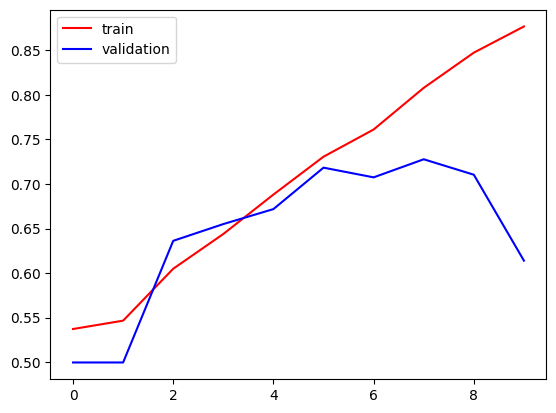

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


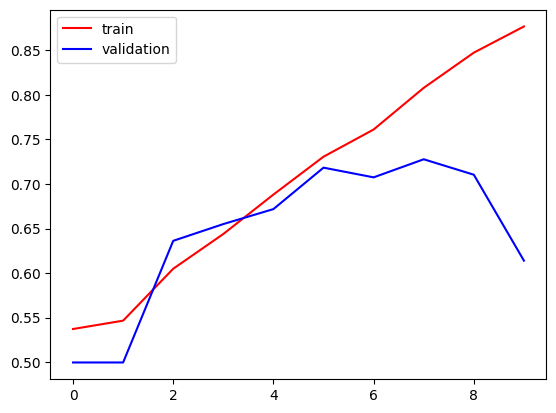

In [39]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

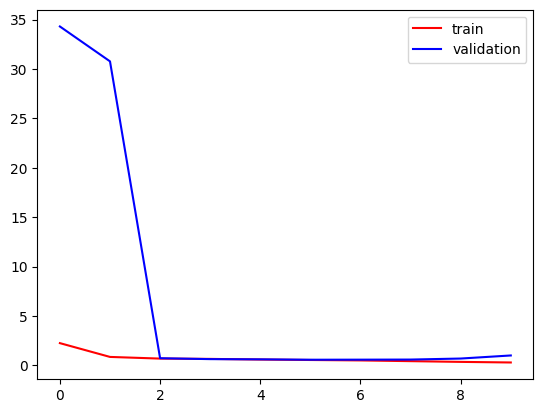

In [40]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


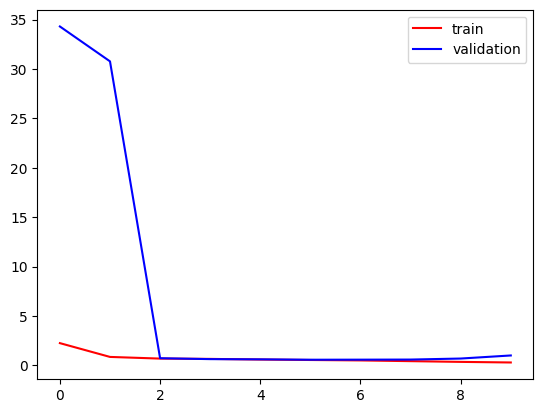

In [41]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [42]:
#need to reduce complexity
#add more data
#reducing complexity

In [43]:
import cv2

In [44]:
test_image=cv2.imread('/content/cat.jpeg')


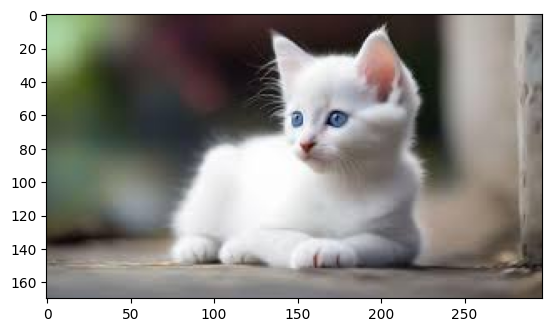

In [52]:
plt.imshow(test_image)

In [54]:
test_image.shape

(170, 297, 3)

In [57]:
test_image = cv2.resize(test_image,(256,256))

In [61]:
test_input = test_image.reshape((1,256,256,3))


In [62]:
model.predict(test_input)

1/1 [==============================] - 1s 927ms/step


array([[1.]], dtype=float32)